## Sample analysis

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.io.wavfile
import matplotlib.pyplot as plt

from eggd800.signal import butter_lowpass_filter
from audiolabel import read_label
from phonlab.utils import dir2df, match_tokentimes

In [4]:
datadir = Path(
    '/Users/ronald/Library/CloudStorage/Box-Box/lin_michael_amazon_nasality_grant/data_analysis'
)
wavdir = Path(
    '/Users/ronald/Library/CloudStorage/Box-Box/cla/projects/digital_queues/external_depositors/amazonian_nasality_data_uploads/006_jorge_emilio_roses_labrada'
)

Get dataframes of textgrids and .wav files to analyze. I'm working with a single made up textgrid. Extract experiment variables from the filenames.

In [3]:
tgdf = dir2df(
    datadir,
    fnpat='(?P<lang>[^_]+)_(?P<spkr>[^_]+)_(?P<researcher>[^_]+)_(?P<tstamp>[^_]+)_(?P<item>.+)_(?P<rep>\d+)\.TextGrid',
    addcols=['barename']
)   
tgdf

,relpath,fname,barename,lang,spkr,researcher,tstamp,item,rep
0,Jorge_analysis/ros,pid_ros_jrl_20220512T110242__removeraguaM__0.T...,pid_ros_jrl_20220512T110242__removeraguaM__0,pid,ros,jrl,20220512T110242,_removeraguaM_,0
1,Jorge_analysis/ros,pid_ros_jrl_20220512T110301__removeraguaF__0.T...,pid_ros_jrl_20220512T110301__removeraguaF__0,pid,ros,jrl,20220512T110301,_removeraguaF_,0
2,Jorge_analysis/ros,pid_ros_jrl_20220512T110332__quebrarM__0.TextGrid,pid_ros_jrl_20220512T110332__quebrarM__0,pid,ros,jrl,20220512T110332,_quebrarM_,0
3,Jorge_analysis/ros,pid_ros_jrl_20220512T110354__quebrarF__0.TextGrid,pid_ros_jrl_20220512T110354__quebrarF__0,pid,ros,jrl,20220512T110354,_quebrarF_,0
4,Jorge_analysis/ros,pid_ros_jrl_20220512T110420__covarM__0.TextGrid,pid_ros_jrl_20220512T110420__covarM__0,pid,ros,jrl,20220512T110420,_covarM_,0
...,...,...,...,...,...,...,...,...,...
91,Jorge_analysis/ros,pid_ros_jrl_20220512T114937__alumbrarM__0.Text...,pid_ros_jrl_20220512T114937__alumbrarM__0,pid,ros,jrl,20220512T114937,_alumbrarM_,0
92,Jorge_analysis/ros,pid_ros_jrl_20220512T114958__alumbrarF__0.Text...,pid_ros_jrl_20220512T114958__alumbrarF__0,pid,ros,jrl,20220512T114958,_alumbrarF_,0
93,Jorge_analysis/ros,pid_ros_jrl_20220518T145005__bannarseM__0.Text...,pid_ros_jrl_20220518T145005__bannarseM__0,pid,ros,jrl,20220518T145005,_bannarseM_,0
94,Jorge_analysis/ros,pid_ros_jrl_20220518T145100__bannarseM__1.Text...,pid_ros_jrl_20220518T145100__bannarseM__1,pid,ros,jrl,20220518T145100,_bannarseM_,1


In [5]:
wavdf = dir2df(
    wavdir,
    fnpat='(?P<lang>[^_]+)_(?P<spkr>[^_]+)_(?P<researcher>[^_]+)_(?P<tstamp>[^_]+)_(?P<item>.+)_(?P<rep>\d+)\.wav',
    addcols=['barename']
)
wavdf

,relpath,fname,barename,lang,spkr,researcher,tstamp,item,rep
0,pid/aop/20220512,pid_aop_jrl_20220512T090321__zero__0.wav,pid_aop_jrl_20220512T090321__zero__0,pid,aop,jrl,20220512T090321,_zero_,0
1,pid/aop/20220512,pid_aop_jrl_20220512T090455__beberM__0.wav,pid_aop_jrl_20220512T090455__beberM__0,pid,aop,jrl,20220512T090455,_beberM_,0
2,pid/aop/20220512,pid_aop_jrl_20220512T090519__beberF__0.wav,pid_aop_jrl_20220512T090519__beberF__0,pid,aop,jrl,20220512T090519,_beberF_,0
3,pid/aop/20220512,pid_aop_jrl_20220512T090546__entrarM__0.wav,pid_aop_jrl_20220512T090546__entrarM__0,pid,aop,jrl,20220512T090546,_entrarM_,0
4,pid/aop/20220512,pid_aop_jrl_20220512T090703__entrarM__1.wav,pid_aop_jrl_20220512T090703__entrarM__1,pid,aop,jrl,20220512T090703,_entrarM_,1
...,...,...,...,...,...,...,...,...,...
995,pid/ros/20220518,pid_ros_jrl_20220518T144941__zero__1.wav,pid_ros_jrl_20220518T144941__zero__1,pid,ros,jrl,20220518T144941,_zero_,1
996,pid/ros/20220518,pid_ros_jrl_20220518T145005__bannarseM__0.wav,pid_ros_jrl_20220518T145005__bannarseM__0,pid,ros,jrl,20220518T145005,_bannarseM_,0
997,pid/ros/20220518,pid_ros_jrl_20220518T145100__bannarseM__1.wav,pid_ros_jrl_20220518T145100__bannarseM__1,pid,ros,jrl,20220518T145100,_bannarseM_,1
998,pid/ros/20220518,pid_ros_jrl_20220518T145120__bannarseF__0.wav,pid_ros_jrl_20220518T145120__bannarseF__0,pid,ros,jrl,20220518T145120,_bannarseF_,0


In [6]:
def get_sigs(wavfile, chan=['audio', 'orfl', None, 'nsfl'], cutoff=50, order=3):
    '''
    Get signals from `wavfile`.
    
    Parameters
    ----------
    
    wavfile : Path or str
    The .wav file to read.
    
    chan : list of str
    A list of signal channels in the order that they occur in the wavfile. Use
    None as a placeholder for a channel from wavfile that will not be returned.
    Channels named 'orfl' and 'nsfl' will be filtered.
    
    cutoff : num
    Cutoff value of the lowpass butterworth filter for 'orfl' and 'nsfl' signals.
    
    order : int
    Order of the lowpass butterworth filter for 'orfl' and 'nsfl' signals.
    
    Returns
    -------
    Tuple consisting of:
    
    rate : num
    Data sample rate.
    
    ts : array
    Times corresponding to each sample value.
    
    arrays : array
    An array for each non-None value passed as `chan`. With the default value of
    `chan` three arrays are returned, for a total of five elements in the returned
    tuple.
    '''
    chanmap = {c: idx for idx, c in enumerate(chan) if c is not None}
    (rate, data) = scipy.io.wavfile.read(wavfile)
    ts = np.arange(data.shape[0]) / rate
    data[:, chanmap['orfl']] = butter_lowpass_filter(
        data[:, chanmap['orfl']], cutoff, rate, order
    )
    data[:, chanmap['nsfl']] = butter_lowpass_filter(
        data[:, chanmap['nsfl']], cutoff, rate, order
    )
    return (rate, ts, *[data[:, c] for c in chanmap.values()])

In [7]:
for row in tgdf.itertuples():
    pass
    # There is only one textgrid in the sample I'm working with, so let's
    # move on and illustrate what can be done in this loop by working
    # with the current value of `row`. See next cell(s).

Load the tier(s) from the textgrid as dataframe(s), then select tokens from the dataframe. Add some `item` and `spkr` metadata from `row`.

In [15]:
# Set of consonant symbols.
consonants = ['kʷ', 't͡ʃ', 'ʔ']

[wddf, phdf, notesdf] = read_label(str(datadir / row.relpath / row.fname), ftype='praat')
tokens = phdf[phdf['label'].isin(consonants)].copy()
tokens['item'] = row.item
tokens['spkr'] = row.spkr
tokens

,t1,t2,label,fname,item,spkr
1,3.266950,3.340164,t͡ʃ,/Users/ronald/Library/CloudStorage/Box-Box/lin...,_bannarseF_,ros
3,3.395831,3.441817,ʔ,/Users/ronald/Library/CloudStorage/Box-Box/lin...,_bannarseF_,ros
5,3.542864,3.662064,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/lin...,_bannarseF_,ros
12,4.727031,4.804481,t͡ʃ,/Users/ronald/Library/CloudStorage/Box-Box/lin...,_bannarseF_,ros
14,4.851072,4.891612,ʔ,/Users/ronald/Library/CloudStorage/Box-Box/lin...,_bannarseF_,ros
16,5.008391,5.141508,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/lin...,_bannarseF_,ros
23,6.143536,6.248819,t͡ʃ,/Users/ronald/Library/CloudStorage/Box-Box/lin...,_bannarseF_,ros
25,6.319613,6.344421,ʔ,/Users/ronald/Library/CloudStorage/Box-Box/lin...,_bannarseF_,ros
27,6.432157,6.565273,kʷ,/Users/ronald/Library/CloudStorage/Box-Box/lin...,_bannarseF_,ros
34,7.561011,7.634830,t͡ʃ,/Users/ronald/Library/CloudStorage/Box-Box/lin...,_bannarseF_,ros


Load the signals. Oral flow and nasal flow are lowpass filtered.

In [19]:
(rate, ts, audio, orfl, nsfl) = get_sigs(str(wavdir / row.lang / row.spkr / row.tstamp[:8] / f'{row.barename}.wav'))

For each selected token, read the corresponding data from the nasal flow channel.

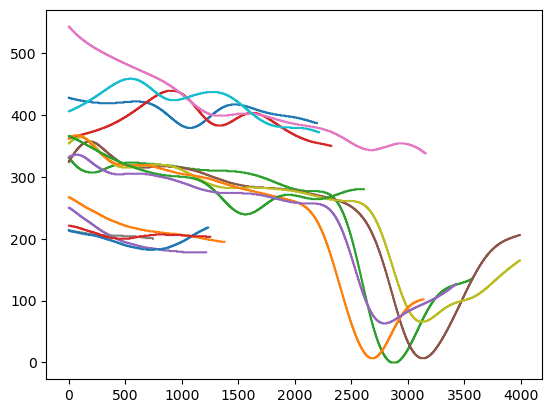

In [20]:
for tok in tokens.itertuples():
    rng = np.arange(match_tokentimes(tok.t1, ts), match_tokentimes(tok.t2, ts))
    plt.plot(nsfl[rng])
    # Call landmark-finding function here.